# Pre-Processing : Library and Data file import

In [1]:
#FINDING RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 17.2 gigabytes of available RAM



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
pd.set_option('display.max_columns', 999)

In [3]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import gc

/Users/akhileshpandita/AnacondaParentFolder/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import time
import warnings
warnings.filterwarnings("ignore")

In [5]:
import imblearn
import collections
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 

# 1. Processing data for appropriate Date-Time Values

*******************    
# DATA IMPORT HERE #
Raw Data file
*******************

In [5]:
df = pd.read_pickle("shoppers.pkl")

## Pre-processing

In [6]:
df.drop('category_id',axis=1,inplace=True)

In [9]:
df['event_time'] = pd.DatetimeIndex(df['event_time']).tz_localize('UTC').tz_convert('US/Eastern')

In [10]:
df['year'] = pd.DatetimeIndex(df['event_time']).year
df['month'] = pd.DatetimeIndex(df['event_time']).month

In [11]:
# Month

MM = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month'] = pd.DatetimeIndex(df['event_time']).month.map(MM)

In [12]:
# Weekday

dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fr', 5:'Sat', 6:'Sun'}
df['weekday'] = pd.DatetimeIndex(df['event_time']).weekday.map(dayOfWeek)

In [14]:
# Phase of day

df['hour'] = pd.DatetimeIndex(df['event_time']).hour
timeOfDay={0:'Dawn',1:'Dawn',2:'Dawn',3:'Dawn',4:'Dawn',5:'EarlyMorning',6:'EarlyMorning',7:'EarlyMorning',8:'EarlyMorning', 9:'Morning',10:'Morning',11:'Morning', 12:'Noon', 13:'Afternoon',14:'Afternoon',15:'Afternoon',16:'Afternoon', 17:'Evening',18:'Evening',19:'Evening',20:'Evening', 21:'Night',22:'Night',23:'Night', 24:'Midnight'}
df['timeOfDay'] = df.hour.map(timeOfDay)

In [15]:
# Is Weekend?

df['Weekend']= df.weekday.apply(lambda x : 1 if x in ['Sunday','Saturday'] else 0)

In [18]:
#This step is only for cosmetics data

In [17]:
df = df[['event_time','user_id','user_session','product_id','event_type','brand','price','year','month','weekday','hour','timeOfDay','Weekend']]

In [201]:
#Holdiays not included due to computational issues

In [186]:
# #Is holiday?

#holidaysDF = pd.read_csv("holidays.csv")
#holidaysDF['Date']= pd.DatetimeIndex(holidaysDF['Date']).tz_localize('UTC').tz_convert('US/Eastern')
# holidaysList = []

# for item in holidaysDF['Date'].to_list():
#     holidaysList.append(pd.Timestamp(item))

# Holiday = df.event_time.apply(lambda x : 1 if x in holidaysList else 0)
# df['Holiday']= Holiday

Adding COLUMNS TO DF -  AMOUNT BY USER for all events

In [20]:
AmountbyUser = pd.pivot_table(df, index='user_id',columns='event_type',values='price',fill_value=0)

In [21]:
AmountbyUser = AmountbyUser.rename(columns={'cart':'OverallAmtUserCarted','purchase':'OverallAmtUserPurchased','view':'OverallAmtUserViewed'})

In [22]:
df = pd.merge(df,AmountbyUser,on='user_id',how='outer')

    BELOW STEP:
    ONLY APPLICABLE IF REMOVE EVENT PRESENT IN DATABASE

In [27]:
df = df.rename(columns={'remove_from_cart':'OverallAmtUserRemoved'})

In [29]:
df.head()

,event_time,user_id,user_session,product_id,event_type,brand,price,year,month,weekday,hour,timeOfDay,Weekend,OverallAmtUserCarted,OverallAmtUserPurchased,OverallAmtUserRemoved,OverallAmtUserViewed
0,2019-09-30 20:00:00-04:00,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5773203,cart,runail,2.62,2019,Sep,Mon,20,Evening,0,2.381429,2.063684,0.95,0.0
1,2019-09-30 20:00:03-04:00,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5773353,cart,runail,2.62,2019,Sep,Mon,20,Evening,0,2.381429,2.063684,0.95,0.0
2,2019-09-30 20:00:07-04:00,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5723490,cart,runail,2.62,2019,Sep,Mon,20,Evening,0,2.381429,2.063684,0.95,0.0
3,2019-09-30 20:02:32-04:00,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5857283,cart,runail,2.62,2019,Sep,Mon,20,Evening,0,2.381429,2.063684,0.95,0.0
4,2019-09-30 20:02:40-04:00,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5723523,cart,runail,2.62,2019,Sep,Mon,20,Evening,0,2.381429,2.063684,0.95,0.0


*******************    
# DATA IMPORT HERE #
*******************

Processed Data Frame

In [30]:
# SAVE TO PICKLE
#df.to_pickle("dfCosmetics.pkl")

In [23]:
#READ FROM PICKLE
df = pd.read_pickle("dfcosmetics.pkl")

In [34]:
df.shape

(20692709, 17)

In [37]:
df.isnull().sum(axis = 0)

event_time                    0
user_id                       0
user_session               4598
product_id                    0
event_type                    0
brand                         0
price                         0
year                          0
month                         0
weekday                       0
hour                          0
timeOfDay                     0
Weekend                       0
OverallAmtUserCarted          0
OverallAmtUserPurchased       0
OverallAmtUserRemoved         0
OverallAmtUserViewed          0
dtype: int64

In [47]:
NullUserSessionIndex = df[(df.user_session.isna())==True].index

In [51]:
df.drop(NullUserSessionIndex,inplace=True)

# 2. Creating Features

## Features to build:

    Weekday(Sun/Mon/...) [One hot encoded]
    Month [One hot encoded]
    TimeOfDay(Morning/Evening/....) [One hot encoded]
    InteractionTime(Duration of Session in seconds)
    
    #TotalEventsInSession()
    #ViewEventsInSession
    #CartEventsInSession
    
    #CategoriesViewedInSession
    #CategoriesCartedInSession
    #BrandsViewedInSession
    #BrandsCartedInSession
    #ProductsViewedInSession
    #ProductsCartedInSession
    
    AverageAmountViewedInSession
    AverageAmountCartedInSession
    
    #HolidaysDuringSession()
    #WeekendDuringSession()
    
    LastSession(1: if the Session is last for a user, 0 if not)
    
    ViewToCartTime (Time between viewing and carting in session)
    
    Other suggested Features:
        AvgPRDViewbyUser (total products viewed/total sessions by user)
        AvgPRDCartbyUser  (total products carted/total sessions by user)
        AvgCTGViewbyUser (total categories viewed/total sessions by user)
        AvgCTGCartbyUser (total categories viewed/total sessions by user)

## GROUPING THE DATA

In [53]:
GroupUS = df.sort_values('event_time').groupby(['user_session'])

## Total Number of Events/Interactions in Session

In [54]:
Features= GroupUS['event_type'].count().reset_index().rename(columns={'event_type':'TotalEventsInSession'})

## Duration

In [55]:
# # Defining function to return range of any given series
def ammd(series):
    return (max(series)-min(series))

In [56]:
interactionTime = GroupUS['event_time'].agg(ammd)

In [57]:
interactionTime = interactionTime.dt.total_seconds()

In [58]:
Features.set_index('user_session', inplace=True)

In [200]:
#Join is MUCH FASTER than Merge

In [59]:
#start_time = time.time()
Features = Features.join(interactionTime, how='left')
#print("--- %s seconds ---" % (time.time() - start_time))

In [37]:
# start_time = time.time()
# X2 = pd.merge(Features,interactionTime, how ='outer', on = 'user_session')
# print("--- %s seconds ---" % (time.time() - start_time))

--- 33.254327058792114 seconds ---


In [60]:
Features = Features.rename(columns={'event_time':'interactionTime'})

In [61]:
Features.head(2)

,TotalEventsInSession,interactionTime
user_session,,
0000061d-f3e9-484b-8c73-e54f355032a3,1,0.0
00000ac8-0015-4f12-996a-be2896323738,1,0.0


##  Number of Interactions by Event Type in Session

In [62]:
NumEventTime = GroupUS['event_type'].value_counts().unstack(fill_value = 0).rename(columns={'view':'#TimesViewedinSession','cart':'#TimesCartedinSession','purchase':'#TimesPurchasedinSession'})

    BELOW STEP:
    ONLY FOR DATASETS HAVING THE REMOVE EVENT

In [70]:
NumEventTime.rename(columns={'remove_from_cart':'#TimesRemovedinSession'},inplace=True)

In [63]:
Features = Features.join(NumEventTime, how='left')

In [64]:
Features.head(1)

,TotalEventsInSession,interactionTime,#TimesCartedinSession,#TimesPurchasedinSession,remove_from_cart,#TimesViewedinSession
user_session,,,,,,
0000061d-f3e9-484b-8c73-e54f355032a3,1,0.0,0,0,0,1


## Max and Min Price

In [71]:
Features['maxPrice'] = GroupUS['price'].max().values

In [72]:
Features['minPrice'] = GroupUS['price'].min().values

In [73]:
Features.head(1)

,TotalEventsInSession,interactionTime,#TimesCartedinSession,#TimesPurchasedinSession,#TimesRemovedinSession,#TimesViewedinSession,maxPrice,minPrice
user_session,,,,,,,,
0000061d-f3e9-484b-8c73-e54f355032a3,1,0.0,0,0,0,1,194.44,194.44


## AVERAGE AMOUNT BY EVENT IN SESSION

In [74]:
AmountbyEvent = pd.pivot_table(df, index='user_session',columns='event_type',values='price',fill_value=0)
AmountbyEvent = AmountbyEvent.rename(columns={'cart':'AvgAmtCartedInSession','purchase':'AvgAmtPurchasedInSession','view':'AvgAmtViewedInSession'})

    BELOW STEP:
    ONLY FOR DATASETS HAVING THE REMOVE EVENT

In [77]:
AmountbyEvent.rename(columns={'remove_from_cart':'#AvgAmtRemovedInSession'},inplace=True)

In [78]:
Features = Features.join(AmountbyEvent, how='left')

In [79]:
Features.head(1)

,TotalEventsInSession,interactionTime,#TimesCartedinSession,#TimesPurchasedinSession,#TimesRemovedinSession,#TimesViewedinSession,maxPrice,minPrice,AvgAmtCartedInSession,AvgAmtPurchasedInSession,#AvgAmtRemovedInSession,AvgAmtViewedInSession
user_session,,,,,,,,,,,,
0000061d-f3e9-484b-8c73-e54f355032a3,1,0.0,0,0,0,1,194.44,194.44,0.0,0.0,0.0,194.44


## BRAND COUNT BY EVENT IN SESSION

In [80]:
BrandsBySession= pd.pivot_table(df, index='user_session',columns='event_type',values='brand',aggfunc='count',fill_value=0)
BrandsBySession = BrandsBySession.rename(columns={'view':'#BrandsViewedInSession','cart':'#BrandsCartedInSession','purchase':'#BrandsPurchasedInSession'})

    BELOW STEP:
    ONLY FOR DATASETS HAVING THE REMOVE EVENT

In [81]:
BrandsBySession.rename(columns={'remove_from_cart':'#BrandsRemovedInSession'},inplace=True)

In [82]:
Features = Features.join(BrandsBySession, how='left')

----------
CATEGORY CODE NOT BEING USED/AVAILABLE FOR COSMETICS DATA
____________

## CATEGORY COUNT BY EVENT IN SESSION

In [84]:
# CategoriesBySession= pd.pivot_table(df, index='user_session',columns='event_type',values='category_code',aggfunc='count',fill_value=0)
# CategoriesBySession = CategoriesBySession.rename(columns={'view':'#CategoriesViewedInSession','cart':'#CategoriesCartedInSession','purchase':'#CategoriesPurchasedInSession'})

In [85]:
# Features = Features.join(CategoriesBySession, how='left')

## ADDING FEATURES FOR AVERAGE OVERALL AMOUNT BY USER FOR DIFFERENT EVENTS

In [83]:
OverallAmtUserCarted = df.groupby('user_session')['OverallAmtUserCarted'].mean()

In [86]:
OverallAmtUserViewed = df.groupby('user_session')['OverallAmtUserViewed'].mean()

In [87]:
OverallAmtUserRemoved = df.groupby('user_session')['OverallAmtUserRemoved'].mean()

In [88]:
OverallAmtUserPurchased = df.groupby('user_session')['OverallAmtUserPurchased'].mean()

In [89]:
#Merging these individual dataframes

Features = Features.join(OverallAmtUserCarted, how='left')

In [90]:
Features = Features.join(OverallAmtUserViewed, how='left')

In [91]:
Features = Features.join(OverallAmtUserRemoved, how='left')

In [92]:
Features = Features.join(OverallAmtUserPurchased, how='left')

## PRODUCT COUNT BY EVENT IN SESSION

In [93]:
ProductsBySession = pd.pivot_table(df, index='user_session',columns='event_type',values='product_id',aggfunc='count',fill_value=0)
ProductsBySession = ProductsBySession.rename(columns={'view':'#ProdsViewedInSession','cart':'#ProdsCartedInSession','purchase':'#ProdsPurchasedInSession'})

    BELOW STEP:
    ONLY FOR DATASETS HAVING THE REMOVE EVENT

In [94]:
ProductsBySession.rename(columns={'remove_from_cart':'#ProdsRemovedInSession'},inplace=True)

In [95]:
Features = Features.join(ProductsBySession, how='left')

In [96]:
Features.head(1)

,TotalEventsInSession,interactionTime,#TimesCartedinSession,#TimesPurchasedinSession,#TimesRemovedinSession,#TimesViewedinSession,maxPrice,minPrice,AvgAmtCartedInSession,AvgAmtPurchasedInSession,#AvgAmtRemovedInSession,AvgAmtViewedInSession,#BrandsCartedInSession,#BrandsPurchasedInSession,#BrandsRemovedInSession,#BrandsViewedInSession,OverallAmtUserCarted,OverallAmtUserViewed,OverallAmtUserRemoved,OverallAmtUserPurchased,#ProdsCartedInSession,#ProdsPurchasedInSession,#ProdsRemovedInSession,#ProdsViewedInSession
user_session,,,,,,,,,,,,,,,,,,,,,,,,
0000061d-f3e9-484b-8c73-e54f355032a3,1,0.0,0,0,0,1,194.44,194.44,0.0,0.0,0.0,194.44,0,0,0,1,4.543833,9.244298,5.891295,2.264476,0,0,0,1


# ONE HOT ENCODED FEATURES

Adding a dummy column for one-hot encoding values easily

In [97]:
df['dummy']= np.zeros(len(df))

## Adding Date and Time Features 

In [98]:
weekday = pd.pivot_table(df, index='user_session',columns='weekday',values='dummy',fill_value=0, aggfunc=lambda x: len(x.unique()) )

In [99]:
year =  pd.pivot_table(df, index='user_session',columns='year',values='dummy',fill_value=0, aggfunc=lambda x: len(x.unique()) )

In [100]:
month =  pd.pivot_table(df, index='user_session',columns='month',values='dummy',fill_value=0, aggfunc=lambda x: len(x.unique()) )

In [101]:
timeOfDay =  pd.pivot_table(df, index='user_session',columns='timeOfDay',values='dummy',fill_value=0, aggfunc=lambda x: len(x.unique()) )

Merging these date and time features

In [102]:
Features = Features.join(weekday, how='left')

In [103]:
Features = Features.join(year, how='left')

In [104]:
Features = Features.join(month, how='left')

In [105]:
Features = Features.join(timeOfDay, how='left')

In [198]:
#Holdiays not included due to computational issues

In [951]:
#Holiday = GroupUS['Holiday'].sum()
## Features = pd.merge(Features,Holiday,on='user_session',how='outer')
# Features = Features.join(Holiday, how='left')


In [106]:
Weekend = GroupUS['Weekend'].sum()

In [107]:
Features = Features.join(Weekend, how='left')

## Dropping all Purchase related Columns and adding Y label 'Purchase'

In [108]:
Features['Purchase'] = Features.AvgAmtPurchasedInSession.apply(lambda x : 1 if x!=0 else 0)

In [109]:
Features.reset_index(inplace=True)

In [112]:
Features.columns

Index([             'user_session',      'TotalEventsInSession',
                 'interactionTime',     '#TimesCartedinSession',
        '#TimesPurchasedinSession',    '#TimesRemovedinSession',
           '#TimesViewedinSession',                  'maxPrice',
                        'minPrice',     'AvgAmtCartedInSession',
        'AvgAmtPurchasedInSession',   '#AvgAmtRemovedInSession',
           'AvgAmtViewedInSession',    '#BrandsCartedInSession',
       '#BrandsPurchasedInSession',   '#BrandsRemovedInSession',
          '#BrandsViewedInSession',      'OverallAmtUserCarted',
            'OverallAmtUserViewed',     'OverallAmtUserRemoved',
         'OverallAmtUserPurchased',     '#ProdsCartedInSession',
        '#ProdsPurchasedInSession',    '#ProdsRemovedInSession',
           '#ProdsViewedInSession',                        'Fr',
                             'Mon',                       'Sat',
                             'Sun',                       'Thu',
                         

In [114]:
FeaturesDF = Features.drop(columns=['user_session',
                                    '#TimesPurchasedinSession',
                                    '#BrandsPurchasedInSession', 
                                    'AvgAmtPurchasedInSession',
                                   'OverallAmtUserPurchased',
                                   '#ProdsPurchasedInSession'])

In [115]:
FeaturesDF.columns

Index([   'TotalEventsInSession',         'interactionTime',
         '#TimesCartedinSession',  '#TimesRemovedinSession',
         '#TimesViewedinSession',                'maxPrice',
                      'minPrice',   'AvgAmtCartedInSession',
       '#AvgAmtRemovedInSession',   'AvgAmtViewedInSession',
        '#BrandsCartedInSession', '#BrandsRemovedInSession',
        '#BrandsViewedInSession',    'OverallAmtUserCarted',
          'OverallAmtUserViewed',   'OverallAmtUserRemoved',
         '#ProdsCartedInSession',  '#ProdsRemovedInSession',
         '#ProdsViewedInSession',                      'Fr',
                           'Mon',                     'Sat',
                           'Sun',                     'Thu',
                           'Tue',                     'Wed',
                            2019,                      2020,
                           'Dec',                     'Feb',
                           'Jan',                     'Nov',
                        

In [116]:
FeaturesDF.sort_values(by='Purchase',ascending=False)

,TotalEventsInSession,interactionTime,#TimesCartedinSession,#TimesRemovedinSession,#TimesViewedinSession,maxPrice,minPrice,AvgAmtCartedInSession,#AvgAmtRemovedInSession,AvgAmtViewedInSession,#BrandsCartedInSession,#BrandsRemovedInSession,#BrandsViewedInSession,OverallAmtUserCarted,OverallAmtUserViewed,OverallAmtUserRemoved,#ProdsCartedInSession,#ProdsRemovedInSession,#ProdsViewedInSession,Fr,Mon,Sat,Sun,Thu,Tue,Wed,2019,2020,Dec,Feb,Jan,Nov,Oct,Sep,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Weekend,Purchase
4535939,11,890.0,4,0,1,23.81,2.38,11.145000,0.000000,5.400000,4,0,1,7.458750,8.719524,6.323750,4,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4061809,21,832.0,12,4,0,7.14,2.70,4.280833,5.157500,0.000000,12,4,0,4.166667,55.322857,4.905000,12,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4061904,114,4142.0,59,21,3,61.90,0.63,4.102034,9.519048,4.446667,59,21,3,17.109452,27.554286,31.575000,59,21,3,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
490825,12,1751.0,6,3,1,7.90,2.86,4.703333,4.866667,7.900000,6,3,1,4.703333,7.900000,4.866667,6,3,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1849717,9,637.0,4,0,1,4.29,1.78,3.185000,0.000000,2.140000,4,0,1,3.185000,2.140000,0.000000,4,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538455,3,164.0,0,0,3,1.59,1.59,0.000000,0.000000,1.590000,0,0,3,6.550000,5.285926,6.113333,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1538456,1,0.0,0,0,1,1.71,1.71,0.000000,0.000000,1.710000,0,0,1,0.000000,4.488571,0.000000,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1538457,1,0.0,0,0,1,0.83,0.83,0.000000,0.000000,0.830000,0,0,1,0.000000,0.970000,0.000000,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1538458,27,3004.0,8,4,15,30.56,2.62,7.506250,6.932500,12.520000,8,4,15,5.244340,8.880734,5.731250,8,4,15,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


In [117]:
print("The features we have are as follows: \n", FeaturesDF.columns.tolist())

print('************')
print("PLEASE NOTE THAT \n One-Hot-Encoded Date and Time features are dynamically added as per data")
print('************')

The features we have are as follows: 
 ['TotalEventsInSession', 'interactionTime', '#TimesCartedinSession', '#TimesRemovedinSession', '#TimesViewedinSession', 'maxPrice', 'minPrice', 'AvgAmtCartedInSession', '#AvgAmtRemovedInSession', 'AvgAmtViewedInSession', '#BrandsCartedInSession', '#BrandsRemovedInSession', '#BrandsViewedInSession', 'OverallAmtUserCarted', 'OverallAmtUserViewed', 'OverallAmtUserRemoved', '#ProdsCartedInSession', '#ProdsRemovedInSession', '#ProdsViewedInSession', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 2019, 2020, 'Dec', 'Feb', 'Jan', 'Nov', 'Oct', 'Sep', 'Afternoon', 'Dawn', 'EarlyMorning', 'Evening', 'Morning', 'Night', 'Noon', 'Weekend', 'Purchase']
************
PLEASE NOTE THAT 
 One-Hot-Encoded Date and Time features are dynamically added as per data
************


*******************    
# DATA IMPORT HERE #
*******************

Features Dataframe

### Saving Final FeaturesDF as pickle

In [118]:
#FeaturesDF.to_pickle("FeaturesDFCosmetics.pkl")

In [11]:
FeaturesDF = pd.read_pickle('FeaturesDFCosmetics.pkl')

### Splitting Training and Testing Data

In [12]:
XData = FeaturesDF.loc[:,:'Weekend']
YData = FeaturesDF.loc[:,'Purchase']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(XData,YData,test_size=0.2,random_state=42)

SCALING DATA WITH MINMAX SCALER

In [14]:
MMscaler = MinMaxScaler()
X_train = MMscaler.fit_transform(X_train)
X_test = MMscaler.transform(X_test)

*******************    
# ----> DATA IMPORT HERE #
*******************

### Saving train and test data in pickles

In [123]:
# np.save('X_trainCosm.npy', X_train)
# np.save('X_testCosm.npy', X_test)
# np.save('y_trainCosm.npy', y_train)
# np.save('y_testCosm.npy', y_test)

In [7]:
X_train= np.load('X_trainCosm.npy')
X_test= np.load('X_testCosm.npy')
y_train = np.load('y_trainCosm.npy')
y_test = np.load('y_testCosm.npy')

## Measuring Feature Relevance

In [124]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(XData)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pcaDF = pd.concat([principalDf, YData], axis = 1)

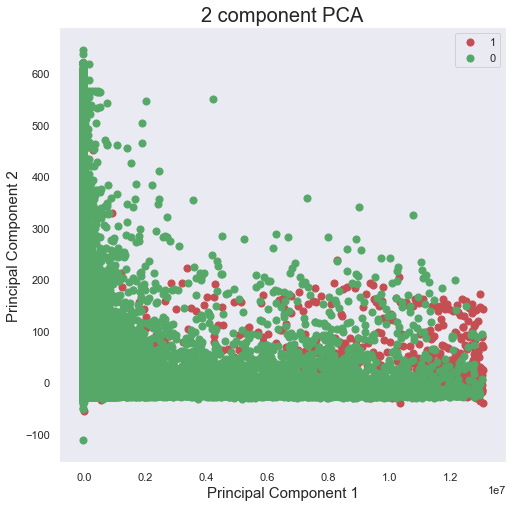

In [125]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']

for T, C in zip(targets,colors):
    indicesToKeep = pcaDF['Purchase'] == T
    ax.scatter(pcaDF.loc[indicesToKeep, 'principal component 1'], pcaDF.loc[indicesToKeep, 'principal component 2'], c = C, s = 50)

ax.legend(targets)
ax.grid()
plt.show()

In [126]:
pca2.explained_variance_ratio_.cumsum()

array([0.99999996, 0.99999999])

# 3. Feature Ranking

## USING RANDOM FOREST

In [6]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

In [8]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [9]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [15]:
selected_feat= XData.columns[(sel.get_support())]

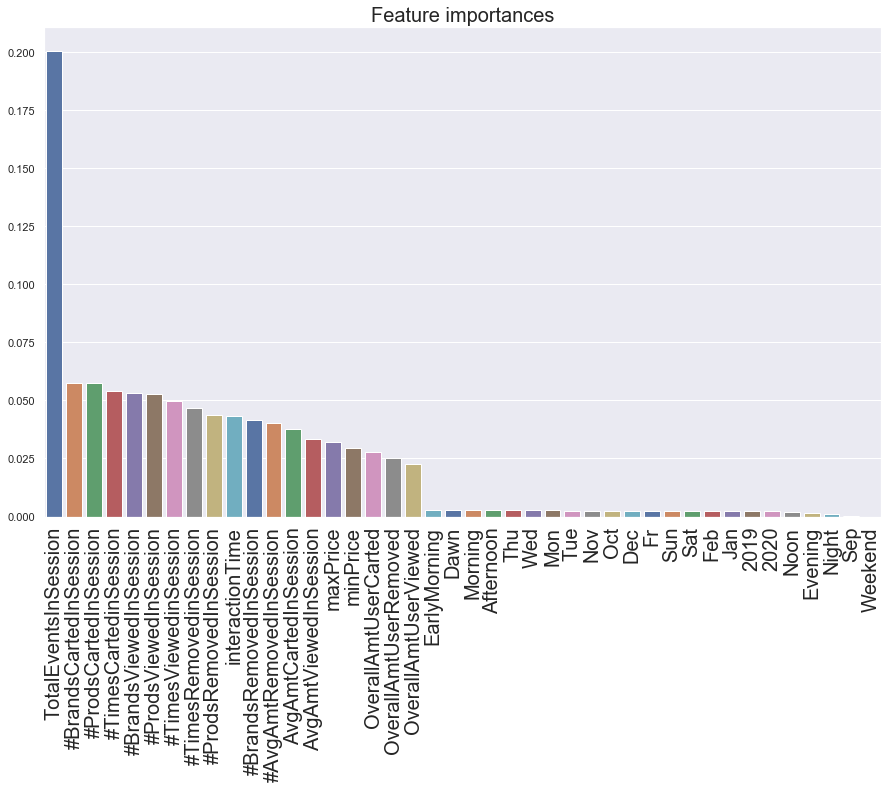

In [16]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1] 
colname = XData.columns[indices]
plt.figure(figsize=(15,9))
plt.title("Feature importances",size=20)
sns.barplot(x=colname, y=importances[indices],palette="deep")
plt.xticks(rotation=90,size=20)
plt.show()

## Using F Scores

In [17]:
import sklearn.feature_selection as fs
kb = fs.SelectKBest(k=X_train.shape[1])

In [18]:
kb.fit(X_train, y_train)

SelectKBest(k=42)

In [19]:
names = XData.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]

In [20]:
names_scores = list(zip(names, scores))

In [21]:
fScoreDF = pd.DataFrame(data = names_scores, columns=['Feat_names','F_Scores'])
fScoreDF_sorted = fScoreDF.sort_values(['F_Scores','Feat_names'], ascending =[False, True])

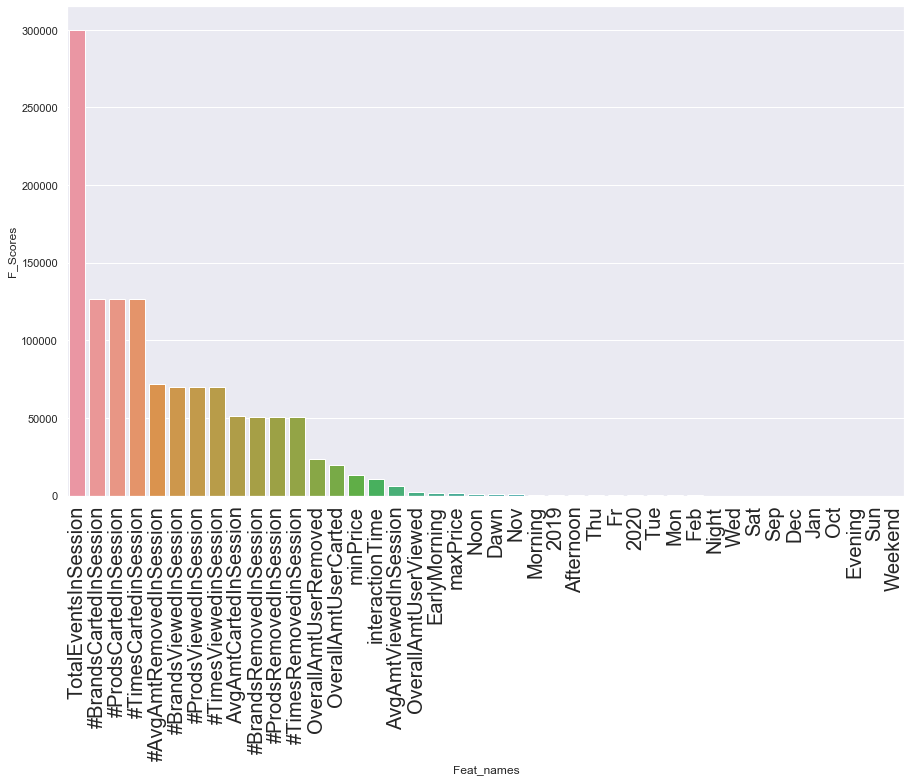

In [22]:
plt.figure(figsize=(15,9))
sns.barplot(x= "Feat_names", y="F_Scores",data=fScoreDF_sorted)
plt.xticks(rotation=90,size=20)
plt.show()

## XGBoosting

In [23]:
XGB = XGBClassifier()

In [24]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
feature_importance = XGB.get_booster().get_score(importance_type='gain')

By GAIN

‘Gain’ is the improvement in accuracy brought by a feature to the branches it is on.

In [26]:
XGBkeys = list(feature_importance.keys())
XGBvalues = list(feature_importance.values())

In [27]:
XGBdata = pd.DataFrame(data=XGBvalues, index=XGBkeys, columns=["score"]).sort_values(by = "score", ascending=False)
XGBdata= XGBdata.reset_index()
XGBdata = XGBdata.rename(columns={'index':'feature'})
XGBdata.feature = XGBdata.feature.apply(lambda x: x.strip('f'))
XGBdata.feature = XGBdata.feature.apply(lambda x: XData.columns[int(x)])

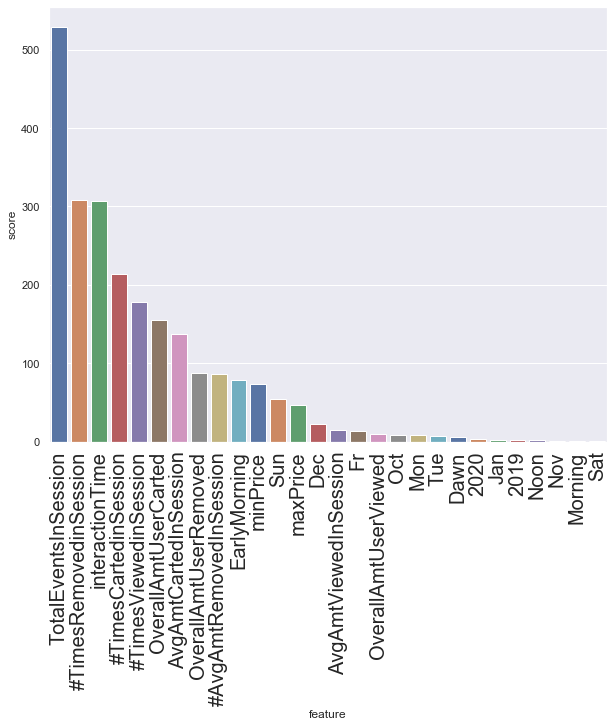

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(x=XGBdata.feature, y=XGBdata.score,palette="deep")
plt.xticks(rotation=90,size=20)
plt.show()

#### By WEIGHT

In [29]:
feature_importance1 = XGB.get_booster().get_score(importance_type='weight')

In [30]:
XGBkeys1 = list(feature_importance1.keys())
XGBvalues1 = list(feature_importance1.values())

In [31]:
XGBdata1 = pd.DataFrame(data=XGBvalues1, index=XGBkeys1, columns=["score"]).sort_values(by = "score", ascending=False)
XGBdata1 = XGBdata1.reset_index()
XGBdata1 = XGBdata1.rename(columns={'index':'feature'})
XGBdata1.feature = XGBdata1.feature.apply(lambda x: x.strip('f'))
XGBdata1.feature = XGBdata1.feature.apply(lambda x: XData.columns[int(x)])

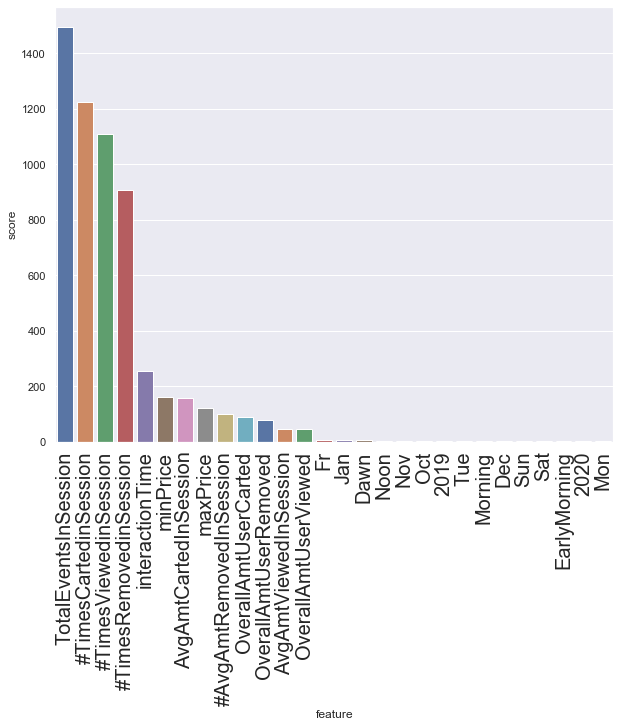

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x=XGBdata1.feature, y=XGBdata1.score,palette="deep")
plt.xticks(rotation=90,size=20)
plt.show()

## Condensing Features based on Above 4 Results

In [33]:
XData.columns

Index([   'TotalEventsInSession',         'interactionTime',
         '#TimesCartedinSession',  '#TimesRemovedinSession',
         '#TimesViewedinSession',                'maxPrice',
                      'minPrice',   'AvgAmtCartedInSession',
       '#AvgAmtRemovedInSession',   'AvgAmtViewedInSession',
        '#BrandsCartedInSession', '#BrandsRemovedInSession',
        '#BrandsViewedInSession',    'OverallAmtUserCarted',
          'OverallAmtUserViewed',   'OverallAmtUserRemoved',
         '#ProdsCartedInSession',  '#ProdsRemovedInSession',
         '#ProdsViewedInSession',                      'Fr',
                           'Mon',                     'Sat',
                           'Sun',                     'Thu',
                           'Tue',                     'Wed',
                            2019,                      2020,
                           'Dec',                     'Feb',
                           'Jan',                     'Nov',
                        

Important Features found in common are:
1. 

****************
# !!! BALANCING DATA !!!
****************

# SMOTE

In [127]:
from imblearn.over_sampling import SMOTE

In [133]:
Counter(YData)

Counter({0: 4380323, 1: 155617})

In [129]:
oversample = SMOTE()

In [130]:
X, Y = oversample.fit_resample(XData, YData)

Plotting before and after SMOTE

In [134]:
Counter(Y)

Counter({0: 4380323, 1: 4380323})

*******************    
# DATA IMPORT HERE #
*******************

Saving SMOTE XData and YData to pickle

In [135]:
# X.to_pickle("XDataSMOTECosm.pkl")
# Y.to_pickle("YDataSMOTECosm.pkl")

In [11]:
X = pd.read_pickle("XDataSMOTECosm.pkl")
Y = pd.read_pickle("YDataSMOTECosm.pkl")

### MEASURING FEATURE RELEVANCE AFTER SMOTE

In [32]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pcaDF = pd.concat([principalDf, Y], axis = 1)

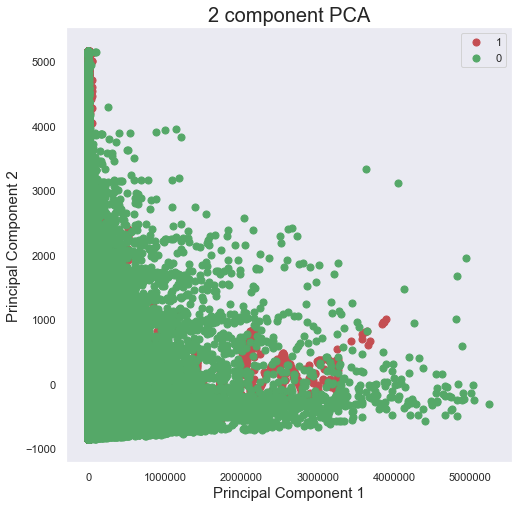

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']

for T, C in zip(targets,colors):
    indicesToKeep = pcaDF['Purchase'] == T
    ax.scatter(pcaDF.loc[indicesToKeep, 'principal component 1'], pcaDF.loc[indicesToKeep, 'principal component 2'], c = C, s = 50)

ax.legend(targets)
ax.grid()
plt.show()

# BASELINING

#  USING KNN - WITHOUT SMOTE

In [28]:
pca = PCA(.95)

In [35]:
pca.fit(X_train)

PCA(n_components=0.95)

In [36]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [39]:
KNN = KNeighborsClassifier(n_neighbors = 4)

In [41]:
y_pred = cross_val_predict(KNN, X_train, y_train, cv=5)

In [42]:
print(metrics.accuracy_score(y_train, y_pred))

0.9303563194425666


In [43]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [44]:
y_predFinal = KNN.predict(X_test)

In [45]:
print(metrics.accuracy_score(y_test, y_predFinal))

0.9305759347839391


In [46]:
cnf_matrix = confusion_matrix(y_test, y_predFinal)
cnf_matrix

array([[2581928,   32985],
       [ 162138,   33545]])

Text(0.5, 3.5, 'Predicted label')

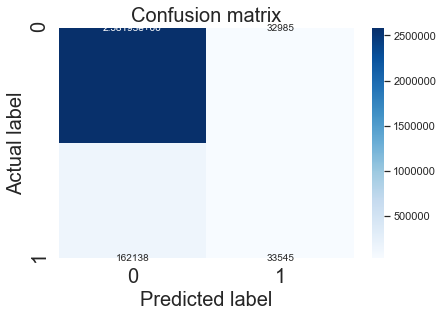

In [47]:
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names,size=20)
plt.yticks(tick_marks, class_names,size=20)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix',size = 20)
plt.ylabel('Actual label',size = 20)
plt.xlabel('Predicted label',size = 20)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predFinal))
print("Precision:",metrics.precision_score(y_test, y_predFinal))
print("Recall:",metrics.recall_score(y_test, y_predFinal))

Accuracy: 0.9305759347839391
Precision: 0.5042086276867579
Recall: 0.17142521322751594


# USING KNN - WITH SMOTE

X and Y are the balanced/SMOTED XData and YData
Splitting them in test and train

In [139]:
pca95 = PCA(0.95)

In [136]:
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2,random_state=42)

In [137]:
MMscaler = MinMaxScaler()
trainX = MMscaler.fit_transform(trainX)
testX = MMscaler.transform(testX)

In [140]:
pca95.fit(trainX)

PCA(n_components=0.95)

In [142]:
trainX = pca95.transform(trainX)
testX = pca95.transform(testX)

*******************    
# ----> DATA IMPORT HERE #
*******************

### SAVING SMOTED TRAIN AND TEST DATA

In [143]:
# np.save('trainXCosm.npy', trainX)
# np.save('testXCosm.npy', testX)
# np.save('trainYCosm.npy', trainY)
# np.save('testYCosm.npy', testY)

In [13]:
trainX = np.load('trainXCosm.npy')
testX = np.load('testXCosm.npy')
trainY = np.load('trainYCosm.npy')
testY = np.load('testYCosm.npy')

## CHOOSING THE BEST K

In [147]:
error_rate = []
Klist = [5,9,13,17,21]

In [149]:
for i in Klist:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(trainX,trainY)
    pred_i = knn_i.predict(testX)
    error_rate.append(np.mean(pred_i != testY))

In [150]:
print(error_rate)

[0.024751017333188748, 0.02433266937955517, 0.02451302129408206, 0.024765285680857015, 0.025052364835942538]


Minimum error:- 0.02433266937955517 at K = 9


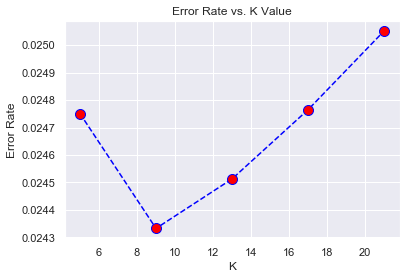

In [151]:
plt.figure(figsize=(6,4))
plt.plot( Klist,error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10 )
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",Klist[error_rate.index(min(error_rate))])
plt.show()

## RUNNING KNN with:
1. K = 10
2. SMOTE
3. PCA

In [152]:
KNN9 = KNeighborsClassifier(n_neighbors = 9, n_jobs = -1 )

In [154]:
predY = cross_val_predict( KNN9, trainX, trainY, cv=5)

In [156]:
print(metrics.accuracy_score(trainY, predY))

0.9752499673254652


In [157]:
KNN9.fit(trainX, trainY)

KNeighborsClassifier(n_jobs=-1, n_neighbors=9)

In [158]:
predFinalY = KNN9.predict(testX)

In [159]:
print(metrics.accuracy_score(testY, predFinalY))

0.9756673306204449


In [160]:
cnf_matrix_SMOTE = confusion_matrix(testY, predFinalY)
cnf_matrix_SMOTE

array([[866780,  10016],
       [ 32618, 842716]])

In [161]:
print("Accuracy:",metrics.accuracy_score(testY, predFinalY))
print("Precision:",metrics.precision_score(testY, predFinalY))
print("Recall:",metrics.recall_score(testY, predFinalY))

Accuracy: 0.9756673306204449
Precision: 0.9882542228976983
Recall: 0.9627365097208609


Text(0.5, 3.5, 'Predicted label SMOTE')

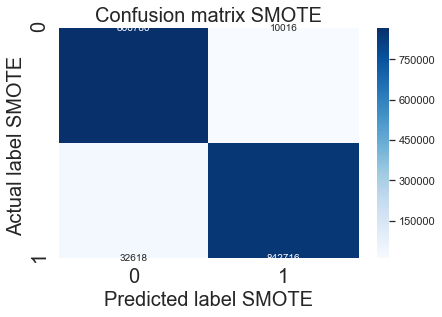

In [162]:
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names,size=20)
plt.yticks(tick_marks, class_names,size=20)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_SMOTE), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix SMOTE',size = 20)
plt.ylabel('Actual label SMOTE ',size = 20)
plt.xlabel('Predicted label SMOTE',size = 20)

--- NOT MUCH DIFFERENCE IN PRECISION AND RECALL ON CHANGING THE VALUE OF K IN KNN

# DBSCAN CLUSTERING

Coming Up